## File Information and Author

In [1]:
## ------------------------------------------------------
## HEADER COMMENTS
## TEAM PROJECT 1
## DATE APRIL 25, 2020
## MODULE AUTHOR Rob Gauer
## FILE NAME 'Team6_Project1_Charts_MN-MI-CO-NatAvg.ipynb'
## ------------------------------------------------------

## Dependancies and Setup

In [2]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np
import requests
import gmaps
import os
import json
import sys
from census import Census
#import datetime

# API keys file load location
sys.path.insert(0, "/Users/rober/Desktop/ClassHomework/keys")

# Census API Key
from project1_config import (api_key, gkey)
c = Census(api_key, year=2018)

# gmaps API Key 
gmaps.configure(api_key=gkey)

# define current date string to append to the names of output files...
import datetime  
def _getToday(): return datetime.date.today().strftime("%Y%m%d")   

## Clean Up Tasks - Program Removal of Previous Chart Image Files

In [3]:
## Prepare Read/Write File Structure by Removal of previous Charts. 
#
# Delete previous chart files from folder called 'Images'... # Cleanup task - Expectation all files exist. 
#---------------
try:
    os.remove("Images/COVID_19_US_SUMMARY_of_Hospitalized_Recovered_versus_Deaths.png") 
    os.remove("Images/COVID_19_US_SUMMARY_of_TotalTests_Positive_versus_Negative_Results.png") 
    os.remove("Images/COVID_19_US_SUMMARY_of_StatePopulation_TotalTested_versus_Deaths.png") 
    os.remove("Images/COVID_19_MN_MI_CO_SUMMARY_of_Hospitalized_Recovered_versus_Deaths_b.png") 
    os.remove("Images/COVID_19_MN_MI_CO_SUMMARY_of_TotalTests_Positive_versus_Negative_Results_b.png") 
    os.remove("Images/COVID_19_MN_MI_CO_SUMMARY_of_StatePopulation_TotalTested_versus_Deaths_b.png") 
    os.remove("Images/COVID_19_MN_MI_CO_Summary_Comparision.png") 
    os.remove("Images/COVID_19_MN_MI_CO_Summary_Comparision_Tests_Positive_Negative.png") 
    os.remove("Images/COVID_19_MN_MI_CO_Summary_Comparision_hospital_recovered_death.png") 
    #---------------
    print("") #Print to terminal message...
    print("------------------------------------------------------------------")
    print("Files Deleted from folder called: 'Images'. Cleanup task complete.")
    print("------------------------------------------------------------------")
    print("")
    #---------------
except FileNotFoundError:
    print("") #Print to terminal message...
    print("----------------------------------------")    
    print("No files to remove, program continues...")
    print("----------------------------------------")
    print("")


------------------------------------------------------------------
Files Deleted from folder called: 'Images'. Cleanup task complete.
------------------------------------------------------------------



## Program Reads CSV Files from Output_Data & Creates DataFrames

In [4]:
## Read Data Files & Create DataFrames
# Importing csv files for charting...  
#       (Phil) Code uses API calls to generate 'Output_Data' csv files, file called: Team6Project1Py.ipynb
# Create dataframes...
#---------------
#Census_County_Population="../Output_Data/Census_County_Population.csv"
Census_County_Population = "%s_%s.%s" % ("Output_Data/Census_County_Population", _getToday(),"csv")
Census_County_Population_df=pd.read_csv(Census_County_Population)
#---------------
#Census_State_Population='../Output_Data/Census_State_Population.csv'
Census_State_Population = "%s_%s.%s" % ("Output_Data/Census_State_Population", _getToday() ,"csv")
Census_State_Population_df=pd.read_csv(Census_State_Population)
#---------------
#COV_Tracking_MN_History_data='../Output_Data/COV_Tracking_MN_History_data.csv'
COV_Tracking_MN_History_data = "%s_%s.%s" % ("Output_Data/COV_Tracking_MN_History_data", _getToday() ,"csv")
COV_Tracking_MN_History_data_df=pd.read_csv(COV_Tracking_MN_History_data)
#---------------
#COV_Tracking_MN_Summary_data='../Output_Data/COV_Tracking_MN_Summary_data.csv'
COV_Tracking_MN_Summary_data = "%s_%s.%s" % ("Output_Data/COV_Tracking_MN_Summary_data", _getToday() ,"csv")
COV_Tracking_MN_Summary_data_df=pd.read_csv(COV_Tracking_MN_Summary_data)
#---------------
#COV_Tracking_US_History_data='../Output_Data/COV_Tracking_US_History_data.csv'
COV_Tracking_US_History_data = "%s_%s.%s" % ("Output_Data/COV_Tracking_US_History_data", _getToday() ,"csv")
COV_Tracking_US_History_data_df=pd.read_csv(COV_Tracking_US_History_data)
#---------------
#COV_Tracking_US_Summary_data='Output_Data/COV_Tracking_US_Summary_data.csv'
COV_Tracking_US_Summary_data = "%s_%s.%s" % ("Output_Data/COV_Tracking_US_Summary_data", _getToday() ,"csv")
COV_Tracking_US_Summary_data_df=pd.read_csv(COV_Tracking_US_Summary_data)
#---------------
#revised_jhu_data='../Output_Data/JHU_data.csv'
jhu_data = "%s_%s.%s" % ("Output_Data/JHU_data", _getToday() ,"csv")
JHU_data_df=pd.read_csv(jhu_data)
#---------------

## Display DataFrames & Prepare DataFrames for Charting 

In [5]:
## CENSUS STATE POPULATION DATAFRAME

Census_State_Population_df=Census_State_Population_df.rename(columns={'Population':'State Population','Abbreviation':'State Abbreviation'})
Census_State_Population_df=Census_State_Population_df[['State','State Abbreviation','State Population']]

# Display dataframe - first five records...
Census_State_Population_df.head()

,State,State Abbreviation,State Population
0,Minnesota,MN,5527358.0
1,Mississippi,MS,2988762.0
2,Missouri,MO,6090062.0
3,Montana,MT,1041732.0
4,Nebraska,NE,1904760.0


In [6]:
# Display record counts
Census_State_Population_df.count()

State                 51
State Abbreviation    51
State Population      51
dtype: int64

In [7]:
## CENSUS COUNTY POPULATION DATAFRAME

Census_County_Population_df=Census_County_Population_df.rename(columns={'Population':'County Population','Abbreviation':'State Abbreviation'})
Census_County_Population_df=Census_County_Population_df[['State','State Abbreviation','County','County Population']]
# Display dataframe - first five records...
Census_County_Population_df.head()

,State,State Abbreviation,County,County Population
0,Mississippi,MS,Washington,47086.0
1,Mississippi,MS,Perry,12028.0
2,Mississippi,MS,Choctaw,8321.0
3,Mississippi,MS,Itawamba,23480.0
4,Mississippi,MS,Carroll,10129.0


In [8]:
# Display record counts
Census_County_Population_df.count()

State                 3142
State Abbreviation    3142
County                3142
County Population     3142
dtype: int64

In [9]:
## COV TRACKING MN HISTORY DATAFRAME

COV_Tracking_MN_History_data_df.columns

Index(['Date', 'State', 'Positive', 'Negative', 'Recovered', 'Date_Checked',
       'Death', 'Hospitalized', 'Total_Test_Results', 'Death_Increase',
       'Hospitalized_Increase', 'Negative_Increase', 'Positive_Increase',
       'Total_Test_Results_Increase'],
      dtype='object')

In [10]:
# Rename column headers
COV_Tracking_MN_History_data_df=COV_Tracking_MN_History_data_df.rename(columns={'State':'State Abbreviation','Date':'File Date','States':'State ID'})
# Merge dataframes
COV_Tracking_MN_History_data_df=pd.merge(COV_Tracking_MN_History_data_df,Census_State_Population_df, on='State Abbreviation',how='left')
# Reorganize the column headers
COV_Tracking_MN_History_data_df=COV_Tracking_MN_History_data_df[['File Date','State','State Abbreviation','State Population','Positive','Negative','Total_Test_Results','Hospitalized','Recovered','Death','Date_Checked']]
# Eliminate 'State' rows with NaN values
COV_Tracking_MN_History_data_df.dropna(subset=['State'], inplace=True)
#COV_Tracking_MN_History_data_df
# Replace NaN values with (0)s
COV_Tracking_MN_History_data_df.fillna(0, inplace=True)
#COV_Tracking_MN_History_data_df
# Display dataframe - first five records...
COV_Tracking_MN_History_data_df.head()

,File Date,State,State Abbreviation,State Population,Positive,Negative,Total_Test_Results,Hospitalized,Recovered,Death,Date_Checked
0,20200423,Minnesota,MN,5527358.0,2942,48606,51548,712.0,1536.0,200.0,2020-04-23T20:00:00Z
1,20200422,Minnesota,MN,5527358.0,2721,46623,49344,660.0,1317.0,179.0,2020-04-22T20:00:00Z
2,20200421,Minnesota,MN,5527358.0,2567,45130,47697,629.0,1254.0,160.0,2020-04-21T20:00:00Z
3,20200420,Minnesota,MN,5527358.0,2470,44380,46850,602.0,1202.0,143.0,2020-04-20T20:00:00Z
4,20200419,Minnesota,MN,5527358.0,2356,43360,45716,574.0,1160.0,134.0,2020-04-19T20:00:00Z


In [11]:
# Display record counts
COV_Tracking_MN_History_data_df.count()

File Date             49
State                 49
State Abbreviation    49
State Population      49
Positive              49
Negative              49
Total_Test_Results    49
Hospitalized          49
Recovered             49
Death                 49
Date_Checked          49
dtype: int64

In [12]:
## COV TRACKING US HISTORY DATAFRAME

COV_Tracking_US_History_data_df.columns

Index(['Date', 'States', 'Positive', 'Negative', 'Recovered', 'Date_Checked',
       'Death', 'Hospitalized', 'Total_Test_Results', 'Death_Increase',
       'Hospitalized_Increase', 'Negative_Increase', 'Positive_Increase',
       'Total_Test_Results_Increase'],
      dtype='object')

In [13]:
# Rename column headers
COV_Tracking_US_History_data_df=COV_Tracking_US_History_data_df.rename(columns={'Date':'File Date','States':'State ID'})
# Merge dataframes
COV_Tracking_US_History_data_df=pd.merge(COV_Tracking_US_History_data_df,Census_State_Population_df, left_on='State ID',right_index=True)
# Reorganize column headers
COV_Tracking_US_History_data_df=COV_Tracking_US_History_data_df[['File Date','State','State Abbreviation','State Population','Positive','Negative','Total_Test_Results','Hospitalized','Recovered','Death','Date_Checked','State ID']]
# Eliminate 'State' rows with NaN values
COV_Tracking_US_History_data_df.dropna(subset=['State'], inplace=True)
#COV_Tracking_US_History_data_df
# Replace NaN values with (0)s
COV_Tracking_US_History_data_df.fillna(0, inplace=True)
#COV_Tracking_US_History_data_df
# Display dataframe - first five records...
COV_Tracking_US_History_data_df.head()

,File Date,State,State Abbreviation,State Population,Positive,Negative,Total_Test_Results,Hospitalized,Recovered,Death,Date_Checked,State ID
48,20200306,Florida,FL,20598139.0,395,1588.0,1983,0.0,0.0,26.0,2020-03-06T21:00:00Z,37
49,20200305,Washington,WA,7294336.0,277,970.0,1247,0.0,0.0,20.0,2020-03-05T21:00:00Z,25
50,20200304,Rhode Island,RI,1056611.0,209,759.0,968,0.0,0.0,16.0,2020-03-04T21:00:00Z,16
51,20200303,Montana,MT,1041732.0,94,6.0,100,0.0,0.0,14.0,2020-03-03T21:00:00Z,3
52,20200302,Montana,MT,1041732.0,53,0.0,53,0.0,0.0,11.0,2020-03-02T21:00:00Z,3


In [14]:
# Display record counts
COV_Tracking_US_History_data_df.count()

File Date             45
State                 45
State Abbreviation    45
State Population      45
Positive              45
Negative              45
Total_Test_Results    45
Hospitalized          45
Recovered             45
Death                 45
Date_Checked          45
State ID              45
dtype: int64

In [15]:
## COV TRACKING MN SUMMARY DATAFRAME

# Rename column headers
COV_Tracking_MN_Summary_data_df=COV_Tracking_MN_Summary_data_df.rename(columns={'State':'State Abbreviation'})
# Merge dataframes
COV_Tracking_MN_Summary_data_df=pd.merge(COV_Tracking_MN_Summary_data_df,Census_State_Population_df, on='State Abbreviation', how='left')
# Reorganize column headers
COV_Tracking_MN_Summary_data_df=COV_Tracking_MN_Summary_data_df[['State','State Abbreviation','State Population','Positive','Negative','Total_Test_Results','Hospitalized','Recovered','Death','Date_Checked']]
# Display dataframe - first five records...
COV_Tracking_MN_Summary_data_df.head()

,State,State Abbreviation,State Population,Positive,Negative,Total_Test_Results,Hospitalized,Recovered,Death,Date_Checked
0,Minnesota,MN,5527358.0,2942,48606,51548,712,1536,200,2020-04-23T18:40:00Z


In [16]:
## COV TRACKING US SUMMARY DATAFRAME

# Rename column headers
COV_Tracking_US_Summary_data_df=COV_Tracking_US_Summary_data_df.rename(columns={'State':'State Abbreviation'})
# Merge dataframes
COV_Tracking_US_Summary_data_df=pd.merge(COV_Tracking_US_Summary_data_df,Census_State_Population_df, on='State Abbreviation', how='left')
# Reorganize column headers
COV_Tracking_US_Summary_data_df=COV_Tracking_US_Summary_data_df[['State','State Abbreviation','State Population','Positive','Negative','Total_Test_Results','Hospitalized','Recovered','Death','Date_Checked']]
# Eliminate 'State' rows with NaN values
COV_Tracking_US_Summary_data_df.dropna(subset=['State'], inplace=True)
#COV_Tracking_US_Summary_data_df
# Replace NaN values with (0)s
COV_Tracking_US_Summary_data_df.fillna(0, inplace=True)
#COV_Tracking_US_Summary_data_df
# Display dataframe - first five records...
COV_Tracking_US_Summary_data_df

,State,State Abbreviation,State Population,Positive,Negative,Total_Test_Results,Hospitalized,Recovered,Death,Date_Checked
0,Alaska,AK,738516.0,337,11824,12161,0.0,209.0,9.0,2020-04-23T19:36:00Z
1,Alabama,AL,4864680.0,5832,46863,52695,768.0,0.0,197.0,2020-04-24T02:16:00Z
2,Arkansas,AR,2990671.0,2599,31952,34551,291.0,922.0,45.0,2020-04-24T12:43:00Z
3,Arizona,AZ,6946685.0,5769,52928,58697,941.0,1282.0,249.0,2020-04-24T12:46:00Z
4,California,CA,39148760.0,37369,444728,482097,0.0,0.0,1469.0,2020-04-24T12:23:00Z
5,Colorado,CO,5531141.0,11262,41062,52324,2237.0,0.0,552.0,2020-04-24T02:39:00Z
6,Connecticut,CT,3581504.0,23100,48397,71497,0.0,0.0,1639.0,2020-04-23T20:31:00Z
7,District of Columbia,DC,684498.0,3361,12569,15930,0.0,648.0,139.0,2020-04-23T19:50:00Z
8,Delaware,DE,949495.0,3308,13604,16912,0.0,643.0,92.0,2020-04-23T19:52:00Z
9,Florida,FL,20598139.0,29648,271499,301147,4827.0,0.0,1006.0,2020-04-24T02:33:00Z


In [17]:
# Display record counts
COV_Tracking_US_Summary_data_df.count()

State                 51
State Abbreviation    51
State Population      51
Positive              51
Negative              51
Total_Test_Results    51
Hospitalized          51
Recovered             51
Death                 51
Date_Checked          51
dtype: int64

In [18]:
## JHU DATAFRAME
# Rename column headers
JHU_data_df=JHU_data_df.rename(columns={'Admin2':'County','Abbreviation':'State Abbreviation','Combined_Key':'CityStateRegion'})
JHU_data_df=JHU_data_df[['State','State Abbreviation','County','Confirmed','Recovered','Active','Deaths','Last_Update','FIPS','Lat','Long_','CityStateRegion','Country_Region']]
# Display dataframe - first five records...
JHU_data_df.head()

,State,State Abbreviation,County,Confirmed,Recovered,Active,Deaths,Last_Update,FIPS,Lat,Long_,CityStateRegion,Country_Region
0,South Carolina,SC,Abbeville,17,0,17,0,2020-04-21 23:30:50,45001.0,34.223334,-82.461707,"Abbeville, South Carolina, US",US
1,Louisiana,LA,Acadia,114,0,107,7,2020-04-21 23:30:50,22001.0,30.295065,-92.414197,"Acadia, Louisiana, US",US
2,Virginia,VA,Accomack,52,0,52,0,2020-04-21 23:30:50,51001.0,37.767072,-75.632346,"Accomack, Virginia, US",US
3,Idaho,ID,Ada,616,0,604,12,2020-04-21 23:30:50,16001.0,43.452658,-116.241552,"Ada, Idaho, US",US
4,Iowa,IA,Adair,1,0,1,0,2020-04-21 23:30:50,19001.0,41.330756,-94.471059,"Adair, Iowa, US",US


In [19]:
# Display record counts
JHU_data_df.count()

State                 2760
State Abbreviation    2760
County                2760
Confirmed             2760
Recovered             2760
Active                2760
Deaths                2760
Last_Update           2760
FIPS                  2760
Lat                   2760
Long_                 2760
CityStateRegion       2760
Country_Region        2760
dtype: int64

In [20]:
# Create new dataframe for isolating states for comparison charting
States_MNMICO_df=COV_Tracking_US_Summary_data_df
#States_MNMICO_df=States_MNMICO_df.set_index("State") # NO DO NOT SET THIS...
States_MNMICO_df.head()

,State,State Abbreviation,State Population,Positive,Negative,Total_Test_Results,Hospitalized,Recovered,Death,Date_Checked
0,Alaska,AK,738516.0,337,11824,12161,0.0,209.0,9.0,2020-04-23T19:36:00Z
1,Alabama,AL,4864680.0,5832,46863,52695,768.0,0.0,197.0,2020-04-24T02:16:00Z
2,Arkansas,AR,2990671.0,2599,31952,34551,291.0,922.0,45.0,2020-04-24T12:43:00Z
3,Arizona,AZ,6946685.0,5769,52928,58697,941.0,1282.0,249.0,2020-04-24T12:46:00Z
4,California,CA,39148760.0,37369,444728,482097,0.0,0.0,1469.0,2020-04-24T12:23:00Z


In [21]:
# Display record counts
States_MNMICO_df.count()

State                 51
State Abbreviation    51
State Population      51
Positive              51
Negative              51
Total_Test_Results    51
Hospitalized          51
Recovered             51
Death                 51
Date_Checked          51
dtype: int64

In [22]:
# Isolate states for comparision charting
state_columns_df=States_MNMICO_df.loc[(States_MNMICO_df['State']=="Minnesota")
                                      |(States_MNMICO_df["State"]=="Michigan")
                                      |(States_MNMICO_df["State"]=="Colorado")]
state_columns_df

,State,State Abbreviation,State Population,Positive,Negative,Total_Test_Results,Hospitalized,Recovered,Death,Date_Checked
5,Colorado,CO,5531141.0,11262,41062,52324,2237.0,0.0,552.0,2020-04-24T02:39:00Z
22,Michigan,MI,9957488.0,35291,93030,128321,0.0,3237.0,2977.0,2020-04-23T20:41:00Z
23,Minnesota,MN,5527358.0,2942,48606,51548,712.0,1536.0,200.0,2020-04-23T18:40:00Z


In [23]:
# Display record counts             
state_columns_df.count()

State                 3
State Abbreviation    3
State Population      3
Positive              3
Negative              3
Total_Test_Results    3
Hospitalized          3
Recovered             3
Death                 3
Date_Checked          3
dtype: int64

In [24]:
 # Query COV_Tracking_US_History_data table for history records for Minnesota, Michigan, and Colorado. No records exist.
MNMICO_df=COV_Tracking_US_History_data_df.loc[(COV_Tracking_US_History_data_df["State"]=="Minnesota")
                                      |(COV_Tracking_US_History_data_df["State"]=="Michigan")
                                      |(COV_Tracking_US_History_data_df["State"]=="Colorado")]
MNMICO_df             

,File Date,State,State Abbreviation,State Population,Positive,Negative,Total_Test_Results,Hospitalized,Recovered,Death,Date_Checked,State ID


In [41]:
COV_Tracking_US_Summary_data_df.head()

,State,State Abbreviation,State Population,Positive,Negative,Total_Test_Results,Hospitalized,Recovered,Death,Date_Checked
0,Alaska,AK,738516.0,337,11824,12161,0.0,209.0,9.0,2020-04-23T19:36:00Z
1,Alabama,AL,4864680.0,5832,46863,52695,768.0,0.0,197.0,2020-04-24T02:16:00Z
2,Arkansas,AR,2990671.0,2599,31952,34551,291.0,922.0,45.0,2020-04-24T12:43:00Z
3,Arizona,AZ,6946685.0,5769,52928,58697,941.0,1282.0,249.0,2020-04-24T12:46:00Z
4,California,CA,39148760.0,37369,444728,482097,0.0,0.0,1469.0,2020-04-24T12:23:00Z


In [25]:
#Calculate the Means...
states_population_mean=COV_Tracking_US_Summary_data_df['State Population'].mean()
states_positive_mean=COV_Tracking_US_Summary_data_df['Positive'].mean()
states_negative_mean=COV_Tracking_US_Summary_data_df['Negative'].mean()
states_total_test_results_mean=COV_Tracking_US_Summary_data_df['Total_Test_Results'].mean()
states_hospitalized_mean=COV_Tracking_US_Summary_data_df['Hospitalized'].mean()
states_recovered_mean=COV_Tracking_US_Summary_data_df['Recovered'].mean()
states_death_mean=COV_Tracking_US_Summary_data_df['Death'].mean()

# Display the Means...
print("States Population Mean .......... =",states_population_mean)
print("States Positive Mean ............ =",states_positive_mean)
print("States Negative Mean ............ =",states_negative_mean)
print("States Total Test Results Mean .. =",states_total_test_results_mean)
print("States Hospitalized Mean ........ =",states_hospitalized_mean)
print("States Recovered Mean ........... =",states_recovered_mean)
print("States Death Mean ............... =",states_death_mean)

States Population Mean .......... = 6331431.960784313
States Positive Mean ............ = 16877.882352941175
States Negative Mean ............ = 74895.27450980392
States Total Test Results Mean .. = 91773.1568627451
States Hospitalized Mean ........ = 1811.8039215686274
States Recovered Mean ........... = 1244.6470588235295
States Death Mean ............... = 863.7843137254902


In [49]:
US_Summary_Means_df=pd.DataFrame({'State Population':[states_population_mean],
                                 "Positive":[states_positive_mean],
                                  "Negative":[states_negative_mean],
                                  "Total Test Results":[states_total_test_results_mean],
                                  "Hospitalized":[states_hospitalized_mean],
                                  "Recovered":[states_recovered_mean],
                                  "Deaths":[states_death_mean]
                                 })
US_Summary_Means_df

,State Population,Positive,Negative,Total Test Results,Hospitalized,Recovered,Deaths
0,6.331432e+06,16877.882353,74895.27451,91773.156863,1811.803922,1244.647059,863.784314


In [51]:
# Merge dataframes
# new_row=['x','y','z']
#df=df.append(new_row)

#COV_Tracking_US_Summary_merge_mean_data_df=pd.merge(COV_Tracking_US_Summary_data_df,US_Summary_Means_df, on='State', how='left')

## Charting

In [26]:
## CHART: COLOR LEGEND
#    Positive=blue
#    Negative=orange
#    Total Test Results=green
#    Hospitalized=red
#    Recovered=purple
#    Death=brown

<IPython.core.display.Javascript object>


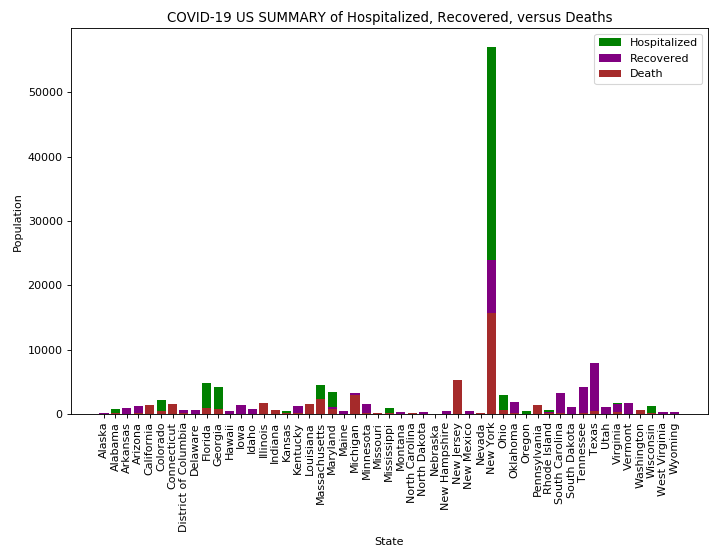

In [27]:
## CHART:  COVID-19 US SUMMARY of Hospitalized, Recovered, versus Deaths

# Set x axis and tick locations
x_axis = np.arange(len(COV_Tracking_US_Summary_data_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(9,7))

#Plot bars...
plt.bar(x_axis, COV_Tracking_US_Summary_data_df["Hospitalized"], color='green', align="center")
plt.xticks(tick_locations, COV_Tracking_US_Summary_data_df["State"], rotation="vertical")
plt.bar(x_axis, COV_Tracking_US_Summary_data_df["Recovered"], color='purple', align="center")
plt.xticks(tick_locations, COV_Tracking_US_Summary_data_df["State"], rotation="vertical")
plt.bar(x_axis, COV_Tracking_US_Summary_data_df["Death"], color='brown', align="center")
plt.xticks(tick_locations, COV_Tracking_US_Summary_data_df["State"], rotation="vertical")

# Set a Title and labels
plt.title("COVID-19 US SUMMARY of Hospitalized, Recovered, versus Deaths")
plt.xlabel("State")
plt.ylabel("Population")
plt.legend(["Hospitalized","Recovered", "Death"], loc='upper right')
#plt.grid()
#plt.yscale("log")

# Save chart to file 
plt.savefig("Images/COVID_19_US_SUMMARY_of_Hospitalized_Recovered_versus_Deaths.png") 

# Display figure
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


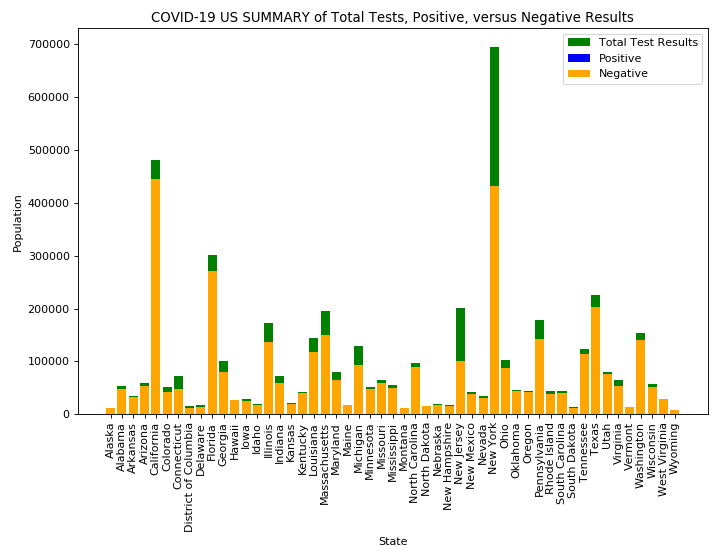

In [28]:
## CHART:  COVID-19 US SUMMARY of Hospitalized, Recovered, versus Deaths

# Set x axis and tick locations
x_axis = np.arange(len(COV_Tracking_US_Summary_data_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(9,7))

#Plot bars...
plt.bar(x_axis, COV_Tracking_US_Summary_data_df["Total_Test_Results"], color='green', align="center")
plt.xticks(tick_locations, COV_Tracking_US_Summary_data_df["State"], rotation="vertical")
plt.bar(x_axis, COV_Tracking_US_Summary_data_df["Positive"], color='blue', align="center")
plt.xticks(tick_locations, COV_Tracking_US_Summary_data_df["State"], rotation="vertical")
plt.bar(x_axis, COV_Tracking_US_Summary_data_df["Negative"], color='orange', align="center")
plt.xticks(tick_locations, COV_Tracking_US_Summary_data_df["State"], rotation="vertical")

# Set a Title and labels
plt.title("COVID-19 US SUMMARY of Total Tests, Positive, versus Negative Results")
plt.xlabel("State")
plt.ylabel("Population")
plt.legend(["Total Test Results","Positive", "Negative"], loc='upper right')
#plt.grid()
#plt.yscale("log")

# Save chart to file 
plt.savefig("Images/COVID_19_US_SUMMARY_of_TotalTests_Positive_versus_Negative_Results.png") 

# Display figure
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


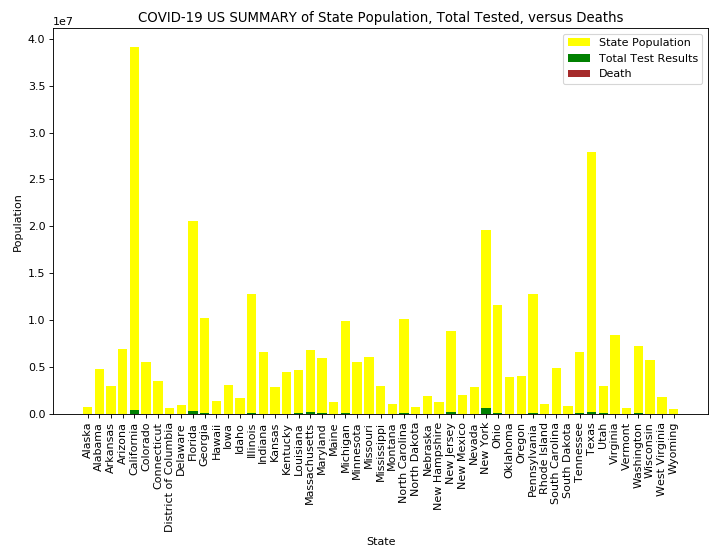

In [29]:
## CHART:  COVID-19 US SUMMARY of Hospitalized, Recovered, versus Deaths

# Set x axis and tick locations
x_axis = np.arange(len(COV_Tracking_US_Summary_data_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(9,7))

#Plot bars...
plt.bar(x_axis, COV_Tracking_US_Summary_data_df["State Population"], color='Yellow', align="center")
plt.xticks(tick_locations, COV_Tracking_US_Summary_data_df["State"], rotation="vertical")
plt.bar(x_axis, COV_Tracking_US_Summary_data_df["Total_Test_Results"], color='green', align="center")
plt.xticks(tick_locations, COV_Tracking_US_Summary_data_df["State"], rotation="vertical")
plt.bar(x_axis, COV_Tracking_US_Summary_data_df["Death"], color='brown', align="center")
plt.xticks(tick_locations, COV_Tracking_US_Summary_data_df["State"], rotation="vertical")

# Set a Title and labels
plt.title("COVID-19 US SUMMARY of State Population, Total Tested, versus Deaths")
plt.xlabel("State")
plt.ylabel("Population")
plt.legend(["State Population","Total Test Results", "Death"], loc='upper right')
#plt.grid()
#plt.yscale("log")

# Save chart to file 
plt.savefig("Images/COVID_19_US_SUMMARY_of_StatePopulation_TotalTested_versus_Deaths.png") 

# Display figure
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


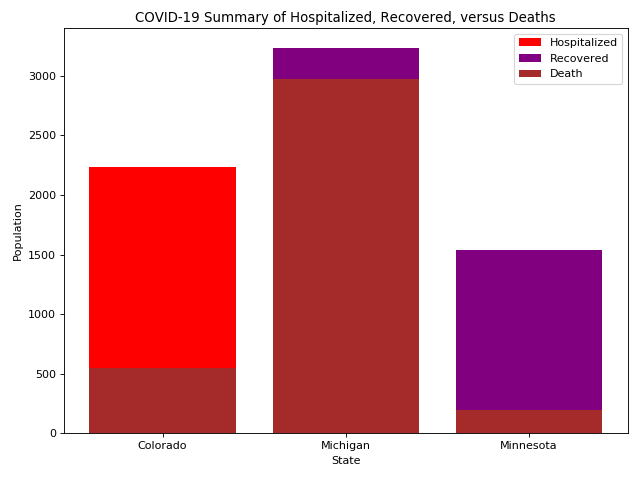

In [30]:
## CHART:  COVID-19 Minnesota, Michigan, Colorado, SUMMARY of Hospitalized, Recovered, versus Deaths

# Set x axis and tick locations
x_axis = np.arange(len(state_columns_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,6))

#Plot bars...
plt.bar(x_axis, state_columns_df["Hospitalized"], color='red', align="center")
plt.xticks(tick_locations, state_columns_df["State"], rotation="vertical")
plt.bar(x_axis, state_columns_df["Recovered"], color='purple', align="center")
plt.xticks(tick_locations, state_columns_df["State"], rotation="vertical")
plt.bar(x_axis, state_columns_df["Death"], color='brown', align="center")
plt.xticks(tick_locations, state_columns_df["State"], rotation="horizontal")

# Set a Title and labels
plt.title("COVID-19 Summary of Hospitalized, Recovered, versus Deaths")
plt.xlabel("State")
plt.ylabel("Population")
plt.legend(["Hospitalized","Recovered", "Death"], loc='upper right')
#plt.grid()
#plt.yscale("log")

# Save chart to file 
plt.savefig("Images/COVID_19_MN_MI_CO_SUMMARY_of_Hospitalized_Recovered_versus_Deaths_b.png") 

# Display figure
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


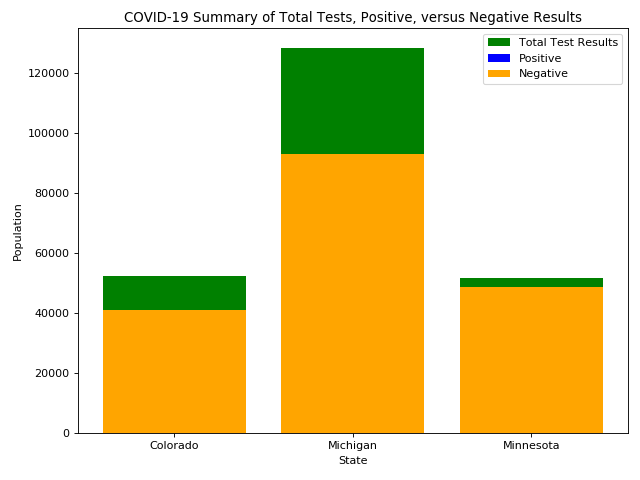

In [31]:
## CHART:  COVID-19 Minnesota, Michigan, Colorado, SUMMARY of Hospitalized, Recovered, versus Deaths

# Set x axis and tick locations
x_axis = np.arange(len(state_columns_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,6))

# Plot bars...
plt.bar(x_axis, state_columns_df["Total_Test_Results"], color='green', align="center")
plt.xticks(tick_locations, state_columns_df["State"], rotation="vertical")
plt.bar(x_axis, state_columns_df["Positive"], color='blue', align="center")
plt.xticks(tick_locations, state_columns_df["State"], rotation="vertical")
plt.bar(x_axis, state_columns_df["Negative"], color='orange', align="center")
plt.xticks(tick_locations, state_columns_df["State"], rotation="horizontal")

# Set a Title and labels
plt.title("COVID-19 Summary of Total Tests, Positive, versus Negative Results")
plt.xlabel("State")
plt.ylabel("Population")
plt.legend(["Total Test Results","Positive", "Negative"], loc='upper right')
#plt.grid()
#plt.yscale("log")

# Save chart to file 
plt.savefig("Images/COVID_19_MN_MI_CO_SUMMARY_of_TotalTests_Positive_versus_Negative_Results_b.png") 

# Display figure
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


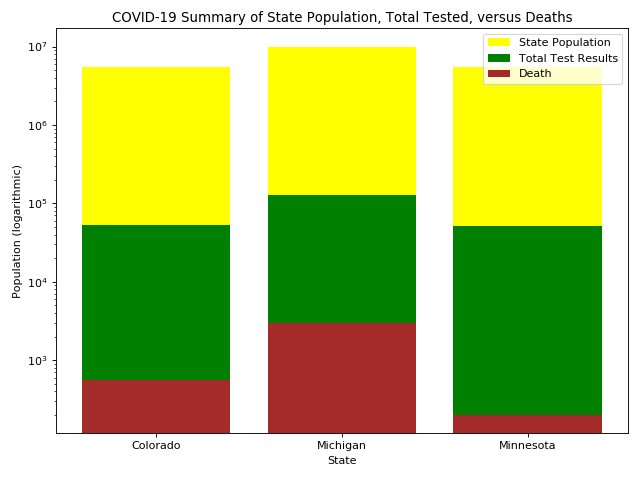

In [32]:
## CHART:  COVID-19 Minnesota, Michigan, Colorado, SUMMARY of Hospitalized, Recovered, versus Deaths

# Set x axis and tick locations
x_axis = np.arange(len(state_columns_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,6))

#Plot bars...
plt.bar(x_axis, state_columns_df["State Population"], color='yellow', align="center")
plt.xticks(tick_locations, state_columns_df["State"], rotation="vertical")
plt.bar(x_axis, state_columns_df["Total_Test_Results"], color='green', align="center")
plt.xticks(tick_locations, state_columns_df["State"], rotation="vertical")
plt.bar(x_axis, state_columns_df["Death"], color='brown', align="center")
plt.xticks(tick_locations, state_columns_df["State"], rotation="horizontal")

# Set a Title and labels
plt.title("COVID-19 Summary of State Population, Total Tested, versus Deaths")
plt.xlabel("State")
plt.ylabel("Population (logarithmic)")
plt.legend(["State Population","Total Test Results", "Death"], loc='upper right')
#plt.grid()
plt.yscale("log")

# Save chart to file 
plt.savefig("Images/COVID_19_MN_MI_CO_SUMMARY_of_StatePopulation_TotalTested_versus_Deaths_b.png") 

# Display figure
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


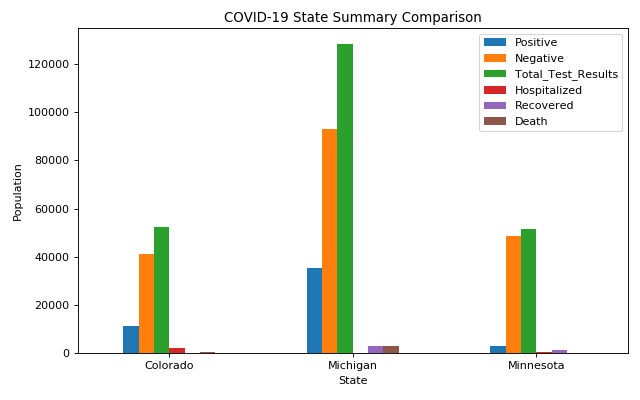

In [33]:
state_comparison_df=state_columns_df[["State","Positive","Negative","Total_Test_Results","Hospitalized","Recovered","Death"]]

# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = state_comparison_df.plot(kind="bar", figsize=(8,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(state_comparison_df["State"], rotation=0)

# Set a Title and labels
plt.title("COVID-19 State Summary Comparison")
plt.xlabel("State")
plt.ylabel("Population")
#plt.grid()
#plt.legend(handles=["Hospitalized","Recovered", "Death"], loc="best")
#plt.yscale("log")

# Save chart to file 
plt.savefig("Images/COVID_19_MN_MI_CO_Summary_Comparision.png") 

# Display figure
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


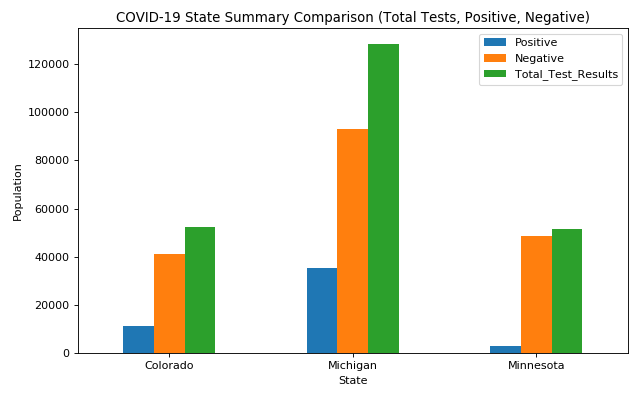

In [34]:
state_comparison_posnegtl_df=state_columns_df[["State","Positive","Negative","Total_Test_Results"]]

# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = state_comparison_posnegtl_df.plot(kind="bar", figsize=(8,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(state_comparison_posnegtl_df["State"], rotation=0)

# Set a Title and labels
plt.title("COVID-19 State Summary Comparison (Total Tests, Positive, Negative)")
plt.xlabel("State")
plt.ylabel("Population")
#plt.grid()
#plt.legend(handles=["Hospitalized","Recovered", "Death"], loc="best")
#plt.yscale("log")

# Save chart to file 
plt.savefig("Images/COVID_19_MN_MI_CO_Summary_Comparision_Tests_Positive_Negative.png") 

# Display figure
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


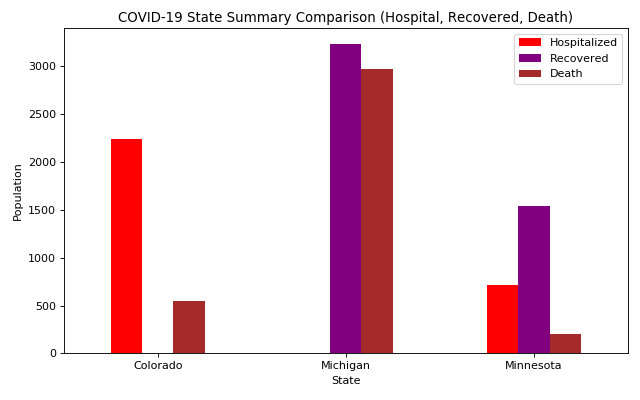

In [35]:
state_comparison_hosrcvrdeath_df=state_columns_df[["State","Hospitalized","Recovered","Death"]]

# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = state_comparison_hosrcvrdeath_df.plot(kind="bar", color=['red','purple','brown'], figsize=(8,5))
my_colors='r' #red,purple,brown...


# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(state_comparison_hosrcvrdeath_df["State"], rotation=0)

# Set a Title and labels
plt.title("COVID-19 State Summary Comparison (Hospital, Recovered, Death)")
plt.xlabel("State")
plt.ylabel("Population")
#plt.grid()
#plt.legend(handles=["Hospitalized","Recovered", "Death"], loc="best")
#plt.yscale("log")

# Save chart to file 
plt.savefig("Images/COVID_19_MN_MI_CO_Summary_Comparision_hospital_recovered_death.png") 

# Display figure
plt.show()
plt.tight_layout()

In [36]:
#state_comparison_date_df=state_columns_df[["State","Positive","Negative","Total_Test_Results","Hospitalized","Recovered","Death","Date_Checked"]]

#date=['Date_Checked']

# Plot our line that will be used to plot total test results
#plt.plot(date, 'Total_Test_Results', color="green", label="Total Test Results")

# Plot our line that will be used to plot total test results
#plt.plot(date, 'Positive', color="blue", label="Positive")

# Plot our line that will be used to plot total test results
#plt.plot(date, 'Negative', color="orange", label="Negative")

# Plot our line that will be used to plot total test results
#plt.plot(date, 'Hospitalized', color="red", label="Hospitalized")

# Plot our line that will be used to plot total test results
#plt.plot(date, 'Recovered', color="purple", label="Recovered")

# Plot our line that will be used to plot total test results
#plt.plot(date, 'Death', color="brown", label="Deaths")

# Place a legend on the chart in what matplotlib believes to be the "best" location
#plt.legend(loc="best")

# Set a Title and labels
#plt.title("COVID-19 State Summary Comparison")
#plt.xlabel("State")
#plt.ylabel("Population")
#plt.grid()
#plt.legend(handles=["Hospitalized","Recovered", "Death"], loc="best")
#plt.yscale("log")

# Save chart to file 
#plt.savefig("Images/COVID_19_MN_MI_CO_Summary_Comparision.png") 

# Display figure
#plt.show()
#plt.tight_layout()

In [37]:
state_columns_df

,State,State Abbreviation,State Population,Positive,Negative,Total_Test_Results,Hospitalized,Recovered,Death,Date_Checked
5,Colorado,CO,5531141.0,11262,41062,52324,2237.0,0.0,552.0,2020-04-24T02:39:00Z
22,Michigan,MI,9957488.0,35291,93030,128321,0.0,3237.0,2977.0,2020-04-23T20:41:00Z
23,Minnesota,MN,5527358.0,2942,48606,51548,712.0,1536.0,200.0,2020-04-23T18:40:00Z


## Write DataFrames Prepared for Charting to CSV Files

In [38]:
## Save Files to Output Folder called Output_Chart_DataFrames...
# Safety measure...

Census_State_Population_df.to_csv('Output_Chart_DataFrames/Chart_Census_state_Population_df.csv', encoding='utf-8', index=False)
Census_County_Population_df.to_csv('Output_Chart_DataFrames/Chart_Census_County_Population_df.csv', encoding='utf-8', index=False)
COV_Tracking_MN_History_data_df.to_csv('Output_Chart_DataFrames/Chart_COV_Tracking_MN_History_data_df.csv', encoding='utf-8', index=False)
COV_Tracking_US_History_data_df.to_csv('Output_Chart_DataFrames/Chart_COV_Tracking_US_History_data_df.csv', encoding='utf-8', index=False)
COV_Tracking_MN_Summary_data_df.to_csv('Output_Chart_DataFrames/Chart_COV_Tracking_MN_Summary_data_df.csv', encoding='utf-8', index=False)
COV_Tracking_US_Summary_data_df.to_csv('Output_Chart_DataFrames/Chart_COV_Tracking_US_Summary_data_df.csv', encoding='utf-8', index=False)
JHU_data_df.to_csv('Output_Chart_DataFrames/Chart_JHU_data_df.csv', encoding='utf-8', index=False)
state_columns_df.to_csv('Output_Chart_DataFrames/state_columns_df.csv', encoding='utf-8', index=False)
state_comparison_df.to_csv('Output_Chart_DataFrames/state_comparison_df.csv', encoding='utf-8', index=False)
state_comparison_posnegtl_df.to_csv('Output_Chart_DataFrames/state_comparison_posnegtl_df.csv', encoding='utf-8', index=False)
state_comparison_hosrcvrdeath_df.to_csv('Output_Chart_DataFrames/state_comparison_hosrcvrdeath_df.csv', encoding='utf-8', index=False)

In [39]:
## EOF ##